Sam Lam
Thomas Verduyn

Project D: Computer exercise for WI4201
Solving the convection-diffusion equation using upwind finite
differences

In [1]:
# setup problem parameters/functions
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import sympy
import copy

def system_solver(N,e): # sets up system Au=f and solves it
    # Initial values
    h=1/N # nr of lines
    
    # Constant values - Boundary conditions
    u0=1
    unp1=0
    
    # Discretisation
    A=scipy.sparse.diags([-e/h-1, 2*e/h+1, -e/h], [-1, 0, 1], shape=(N-1, N-1)).toarray() 
    f=np.zeros(N-1)
    f[0]=e/h+1  # bring bc to rhs
    un=np.linalg.inv(A)@f
    return np.concatenate(([u0],un,[unp1])), A, f

def system_solver2(N,e):
    # Initial values
    h=1/N
    
    # Constant values - Boundary conditions
    u0=1
    unp1=0
    
    # Discretisation
    A=scipy.sparse.diags([-e/h-1, 2*e/h+1, -e/h], [-1, 0, 1], shape=(N-1, N-1)).toarray()
    A=np.vstack((np.zeros((1,N-1)),A,np.zeros((1,N-1))))
    A=np.hstack((np.zeros((N+1,1)),A,np.zeros((N+1,1))))
    A[0,0]=u0
    A[-1,-1]=unp1
    print(A)
    f=np.zeros(N+1)
    f[0]=e/h+1
    un=np.linalg.inv(A)@f
    return np.concatenate(([u0],un,[unp1])), A, f

def testfunc(N,e):
    x=np.linspace(0,1,N+1)
    return (np.exp(x/e)-np.exp(1/e))/(1-np.exp(1/e))

#system_solver2(3,0.5)

Problem 2

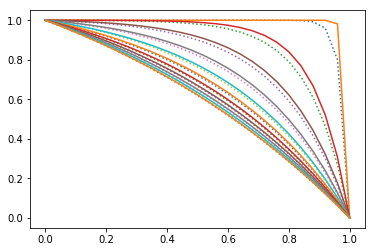

In [2]:
N=25
#%matplotlib notebook
eps = np.linspace(1e-2,1,11)
for e in eps:
    plt.plot(np.linspace(0,1,N+1),system_solver(N,e)[0],label=str(e),ls='dotted')
    plt.plot(np.linspace(0,1,N+1),testfunc(N,e),label='testfunc'+str(e))
#    plt.plot(np.linspace(0,1,N+2),(testfunc(N+2,e)-system_solver(N,e)[0])/testfunc(N+2,e),label=str(e))
#plt.legend()
plt.show()

Problem 2

[0.0625     0.03125    0.015625   0.0078125  0.00390625]


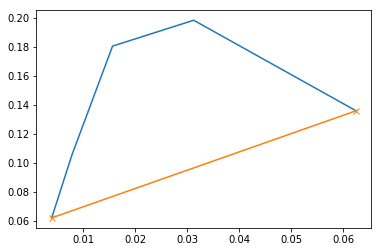

In [3]:
n=5
eps=0.01
error=[]
N_lst=[]
for i in range(4,n+4):
    N=2**i
    N_lst.append(N)
    un=system_solver(N,eps)
    error.append(max(np.abs(un[0]-testfunc(N,eps))))    
plt.plot(1/np.array(N_lst),error) # is not linear
plt.plot([1/N_lst[0],1/N_lst[-1]],[error[0],error[-1]],marker='x')
#plt.plot(range(5),error)
#plt.yscale('log')
print (1/np.array(N_lst))


Problem 3

To prove whether matrix A is symmetric or not we can use the transpose

In [4]:
A=system_solver(5,0.5)[1]
np.allclose(A,A.T)
print(sympy.Matrix(A).rref())
print(np.linalg.eig(A)[0])
print(np.linalg.inv(A))
np.any(np.linalg.inv(A)>=0)  # Check if A_ij>=0

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]]), (0, 1, 2, 3))
[10.78620908  7.82816919  1.21379092  4.17183081]
[[0.25961117 0.15933343 0.08770648 0.03654436]
 [0.2230668  0.38240023 0.21049554 0.08770648]
 [0.17190469 0.29469376 0.38240023 0.15933343]
 [0.10027774 0.17190469 0.2230668  0.25961117]]


True

Problem 4

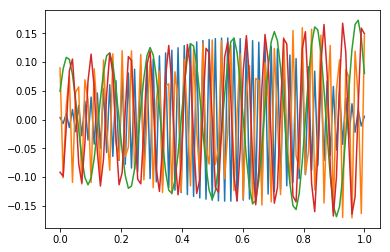

In [5]:
N=100
#%matplotlib notebook
eps=1
A=system_solver(N,eps)[1]
ev, ef=np.linalg.eig(A)
plt.plot(np.linspace(0,1,N-1),ef[:,::25])
#print(np.linspace(1/(N-1),1-1/(N-1),N-1))
plt.show()

#plt.plot(range(1,N),ev)
#plt.hist(ev,bins=len(ev))
#plt.show()

Problem 5

In [6]:
N=15
A=system_solver(N,0.5)[1]
D = np.diag(np.ones(N-1)*A[0,0])
B_jac=np.identity(N-1)-np.matmul(np.linalg.inv(D),A)
ev, ef=np.linalg.eig(B_jac)
#print(np.linalg.eig(A)[0])
print(max(np.abs(ev)))
#print(A)
#print(B_jac)
print(ev)


0.9762352868798289
[-0.97623529 -0.91175944 -0.80743534 -0.66782243 -0.49902248 -0.30841286
 -0.10432411  0.10432411  0.30841286  0.97623529  0.91175944  0.80743534
  0.66782243  0.49902248]


Problem 6

In [7]:
def jacobi(N,eps,rtol=1e-6):
    u,A,f=system_solver(N,eps)
    u_current=np.zeros(N-1)
    tol=1
    u_new=np.zeros(N-1)
    while tol>rtol:
        for i, row in enumerate(A):
            u_new[i]=(f[i]-(row@u_current-A[i,i]*u_current[i]))/A[i,i]
            #print(row,u_current)
        u_current=u_new
        res=f-A@u_new # res_k+1 = f - A*u_k
        tol=np.max(res)/np.max(f)
        #print(res)
    return u_current

N=8
eps=0.5
u=jacobi(N,eps)
u0,A,f=system_solver(N,eps)

print(u)
print(u0[1:-1])

[0.94959915 0.88659891 0.80784973 0.70941448 0.58637159 0.43256891
 0.24031606]
[0.94960149 0.88660336 0.80785569 0.70942111 0.58637788 0.43257385
 0.24031881]


Problem 7

In [8]:
def forwardGS(N, eps, rtol=1e-6):
    u, A, f =system_solver(N,eps)
    u_current = np.zeros(N-1)
    tol = 1
    u_new = np.zeros(N-1)
    while tol>rtol:
        for i, row in enumerate(A):
            u_current[i] = (f[i]-row[:i]@u_current[:i]-row[i+1:]@u_current[i+1:])/A[i,i]
        res = f - A@u_current
        tol=np.max(res)/np.max(f)
    return u_current
                
N=8
eps=0.5
u=forwardGS(N,eps)
u0,A,f=system_solver(N,eps)

#print(np.array(range(8))[2:])
print(u)
print(u0[1:-1])

[0.94959915 0.88659891 0.80784973 0.70941448 0.58637159 0.43256891
 0.24031606]
[0.94960149 0.88660336 0.80785569 0.70942111 0.58637788 0.43257385
 0.24031881]


Problem 8

In [10]:
def backwardGS(N, eps, rtol=1e-6):
    u, A, f =system_solver(N,eps)
    u_current = np.zeros(N-1)
    tol = 1
    u_new = np.zeros(N-1)
    print(A)
    while tol>rtol:
        for i, row in enumerate(A[::-1]):
            row_inv=row
            u_inv=u_current
            u_current[-(i+1)]=(f[-(i+1)]-row[-(i+1):]@u_current[-(i+1):]-(row_inv[i:])[::-1]@(u_inv[i:])[::-1])/A[i,i]
            
            
            
        res = f - A@u_current
        tol=np.max(res)/np.max(f)
    return u_current
                
N=5
eps=1
u=backwardGS(N,eps)
u0,A,f=system_solver(N,eps)

#print(u0[:-(0+1)],u0)

print(u)
print(u0[1:-1])

"""row_inv = row[::-1]
            u_inv = u_current[::-1]
            print(row_inv[:i],u_inv[:i])
            #print(row[:-(i+1)],u_current[:-(i+1)])
            print(row_inv[i:],u_inv[i:],row_inv[i:]@u_inv[i:])
            print(u_current,'current')
            print(f[-(i+1)],-row_inv[:i]@u_inv[:i]-row_inv[i:]@u_inv[i:],A[i,i])
            print('\n')
            u_current[-(i+1)] = (f[-(i+1)]-row_inv[:i]@u_inv[:i]-row_inv[i:]@u_inv[i:])/A[i,i]"""

[[11. -5.  0.  0.]
 [-6. 11. -5.  0.]
 [ 0. -6. 11. -5.]
 [ 0.  0. -6. 11.]]


KeyboardInterrupt: 